In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

warnings.filterwarnings("ignore")


In [3]:

# -----------------------------
# Load dataset
# -----------------------------

df = pd.read_excel('./ML470_S5_RetailSales_Data_Practice.xlsx')



In [4]:

# -----------------------------
# Encode categorical columns
# -----------------------------
categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])



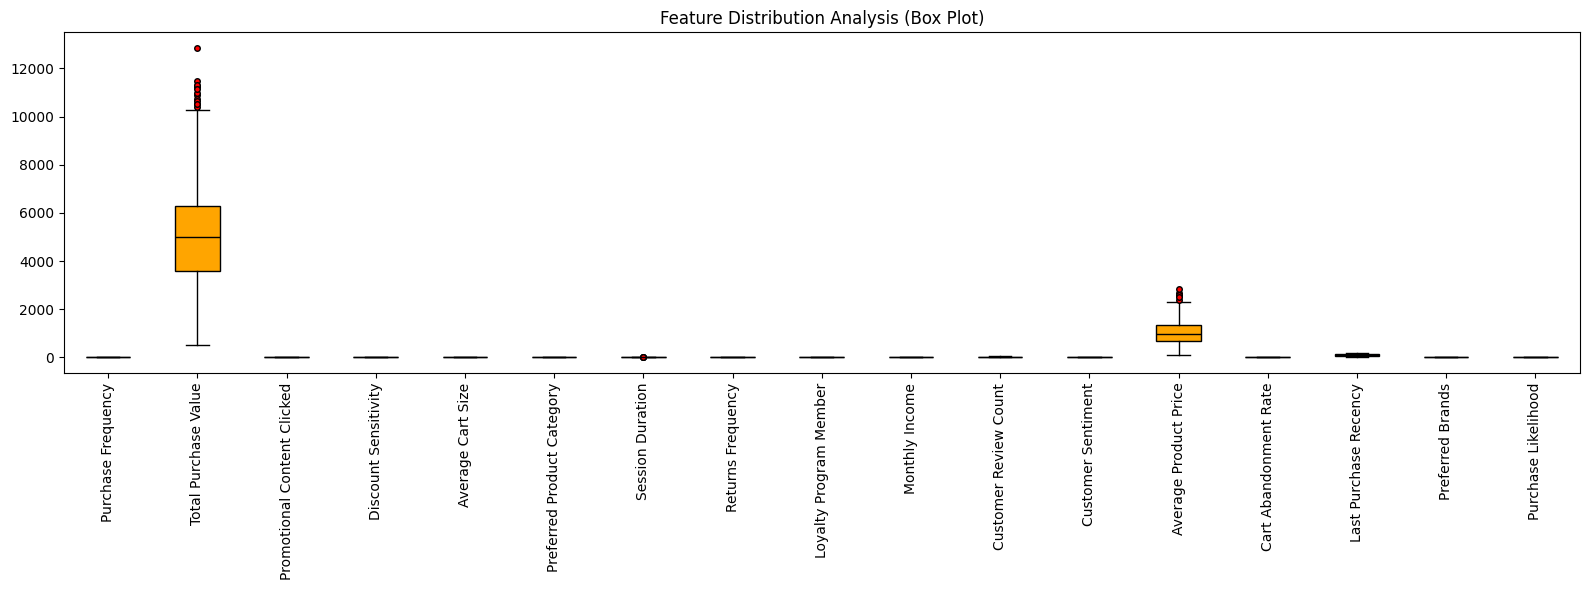

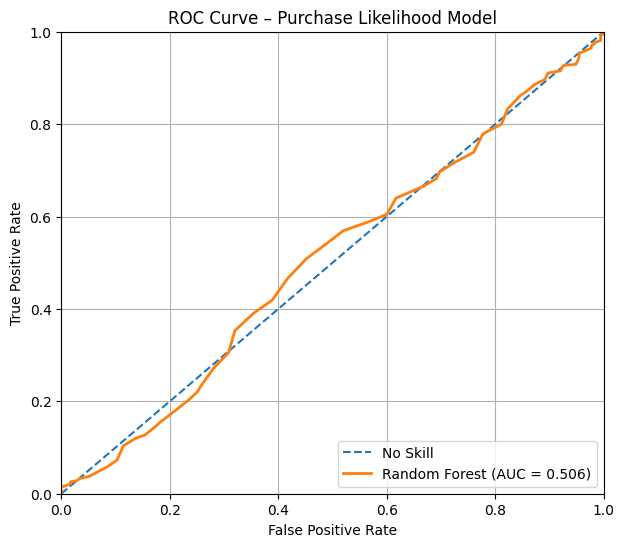

In [5]:


# -----------------------------
# Visualization 1: Box Plot
# -----------------------------
plt.figure(figsize=(16, 6))
plt.boxplot(
    df.values,
    labels=df.columns,
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="orange", color="black"),
    medianprops=dict(color="black"),
    flierprops=dict(marker='o', markerfacecolor='red', markersize=4)
)
plt.xticks(rotation=90)
plt.title("Feature Distribution Analysis (Box Plot)")
plt.tight_layout()
plt.show()

# -----------------------------
# Feature / Target split
# -----------------------------
X = df.drop(columns=["Purchase Likelihood"])
y = df["Purchase Likelihood"]

# -----------------------------
# Train-test split (80-20, sequential)
# -----------------------------
split_idx = int(0.8 * len(df))
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# -----------------------------
# Train Random Forest
# -----------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# -----------------------------
# ROC Curve & AUC
# -----------------------------
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# -----------------------------
# Visualization 2: ROC Curve
# -----------------------------
plt.figure(figsize=(7, 6))

# No-skill baseline
plt.plot([0, 1], [0, 1], linestyle="--", label="No Skill")

# Model ROC curve
plt.plot(
    fpr,
    tpr,
    linewidth=2,
    label=f"Random Forest (AUC = {auc_score:.3f})"
)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Purchase Likelihood Model")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
